# 03 - Algorithms

In this notebook you can find simple examples that showcase how to predict the best future portfolio values according to some heuristic.

You can create your own algorithms by creating a Python module in `modules/experts/`. You have to follow the format of `modules/experts/Sharpe.py`.

In [1]:
import sys
sys.path.insert(0, '../')
%reload_ext autoreload
%autoreload 2

## Start server

The `Server` class is the interface to perform HTTPS requests to acquire data regarding instruments, like stocks.

In [2]:
import time
import logging

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from modules.server import Server
from modules.instruments import Portfolio

In [3]:
srv = Server()
srv.start()

# the following silences the logging output
# logging.getLogger('ibkr-algotrading').setLevel(logging.ERROR)

Once started, we can request information on any stock we want simply by accesing items in `srv`. These will be cached, so only the first access will have significant delay.

## Create Portfolio

we can now request some stocks and create a portfolio with them, adding the portfolio to the server so it knows about its existance

In [4]:
STOCKS = ['SPY', 'XOM', 'MSFT', 'AAPL', 'TSLA', 'IBM', 'AMZN', 'GOOG', 'FB', 'ADBE']
# historical data in a 1 year period in 1 day intervals
stocks = srv[STOCKS, '1y', '1d']

# wealth of 100 USD
portfolio = Portfolio(wealth=100, stocks=stocks)

srv.add_portfolio(portfolio)

[2021-10-21 23:04:34,033] I T140684926121536 server.py:467: Started StockCache thread for bar "1d". 
		Next data update will be in  10525.97s.
[2021-10-21 23:04:34,106] I T140684934514240 server.py:449: Loaded "Stock("SPY", conid=756733)" from StockCache's storage.
[2021-10-21 23:04:34,123] I T140684917466688 server.py:449: Loaded "Stock("XOM", conid=13977)" from StockCache's storage.
[2021-10-21 23:04:34,148] I T140684909073984 server.py:449: Loaded "Stock("MSFT", conid=272093)" from StockCache's storage.
[2021-10-21 23:04:34,195] I T140684900681280 server.py:449: Loaded "Stock("AAPL", conid=265598)" from StockCache's storage.
[2021-10-21 23:04:34,223] I T140684892288576 server.py:449: Loaded "Stock("TSLA", conid=76792991)" from StockCache's storage.
[2021-10-21 23:04:42,347] I T140684892288576 server.py:635: Updated: Stock("TSLA", conid=76792991) - bar: 1d - added period: 37d
[2021-10-21 23:04:42,348] I T140684917466688 server.py:635: Updated: Stock("XOM", conid=13977) - bar: 1d - ad

In [7]:
%pip install seaborn

You should consider upgrading via the '/home/saheru/Documents/Programming/Finance/IBKR/ibeam/env/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


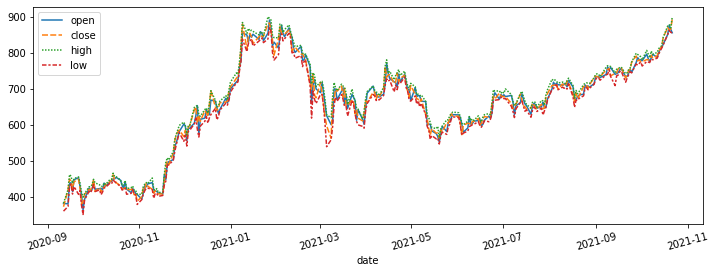

In [11]:
y = ['open', 'close', 'high', 'low']
plt.figure(figsize=(12, 4))
sns.lineplot(data=stocks[4].hist[y])
plt.xticks(rotation=15)
plt.show()

## Experts

Experts are sub-algorithms that provide a prediction to how the wealth of the portfolio should be allocated.

We will use an expert that predicts the allocation that maximizes the sharpe ratio of the portfolio.

In [5]:
from modules import experts

# some experts may need initialisation
experts.Sharpe.init()

# predict for tomorrow
date = pd.Timestamp.today() + pd.Timedelta(days=1)
print('Predicting for date:', date)

weights = experts.Sharpe.predict(pf=portfolio, date=date, srv=srv)

[2021-10-21 23:05:10,619] I T140686362220352 Sharpe.py:70: Starting Sharpe ratio optimizer for dates: 2020-09-11 13:30:00 -> 2021-10-21 23:05:10.617534


Predicting for date: 2021-10-22 23:05:10.617534
Done: Stock("SPY", conid=756733)
Done: Stock("XOM", conid=13977)
Done: Stock("MSFT", conid=272093)
Done: Stock("AAPL", conid=265598)
Done: Stock("TSLA", conid=76792991)
Done: Stock("IBM", conid=8314)
Done: Stock("AMZN", conid=3691937)
Done: Stock("GOOG", conid=208813720)


[2021-10-21 23:05:13,930] I T140686362220352 Sharpe.py:98: Retrieving stock values took 3.309s
[2021-10-21 23:05:13,948] I T140686362220352 Sharpe.py:111: Finished Sharpe ratio optimizer. 
		Optimal weights: [0.88, 0, 1.4e-16, 1.1e-16, 0, 0.12, 1e-17, 0, 0, 1.1e-16]


Done: Stock("FB", conid=107113386)
